In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!pip install patchify

## Dataset

I take this dataset from Kaggle Dataset ([Semantic segmentation of aerial imagery](https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery)).

### About Dataset:
Context:<br>
Humans in the Loop is publishing an open access dataset annotated for a joint project with the Mohammed Bin Rashid Space Center in Dubai, the UAE.

Content: <br>
The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

1. Building: #3C1098
2. Land (unpaved area): #8429F6
3. Road: #6EC1E4
4. Vegetation: #FEDD3A
5. Water: #E2A929
6. Unlabeled: #9B9B9B

Acknowledgements<br>
The images were segmented by the trainees of the Roia Foundation in Syria.

### Understanding the Dataset

In [34]:
import os
import cv2

In [35]:
!ls -lah '/content/drive/MyDrive/Dubai_Arial_Datasets'

total 33K
-rw------- 1 root root  548 Jul 26 15:43  classes.json
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 1'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 2'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 3'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 4'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 5'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 6'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 7'
drwx------ 4 root root 4.0K Jul 26 15:43 'Tile 8'


In [36]:
dataset_root = '/content/drive/MyDrive/'
dataset_folder = "Dubai_Arial_Datasets"

In [37]:
for path, subdirs, files in os.walk(os.path.join(dataset_root, dataset_folder)):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)
  if dir_name == 'masks': # 'images' for images folder
    images = os.listdir(path)
    print(f"Folder/Path: {path}")
    print(f"List of Images: {images}")
    print(f"Number of Images: {len(images)}")
    # for i, image_name in enumerate(images):
    #   if (image_name.endswith('.png')): # '.jpg (If one folder has all type of images [i.e. satellite images and it's mask in same folder])
        # print(image_name)

Dubai_Arial_Datasets
Tile 3
masks
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 3/masks
List of Images: ['image_part_009.png', 'image_part_003.png', 'image_part_007.png', 'image_part_004.png', 'image_part_008.png', 'image_part_001.png', 'image_part_006.png', 'image_part_005.png', 'image_part_002.png']
Number of Images: 9
images
Tile 2
masks
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 2/masks
List of Images: ['image_part_009.png', 'image_part_006.png', 'image_part_001.png', 'image_part_005.png', 'image_part_007.png', 'image_part_002.png', 'image_part_004.png', 'image_part_008.png', 'image_part_003.png']
Number of Images: 9
images
Tile 1
images
masks
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 1/masks
List of Images: ['image_part_008.png', 'image_part_009.png', 'image_part_007.png', 'image_part_005.png', 'image_part_002.png', 'image_part_006.png', 'image_part_001.png', 'image_part_003.png', 'image_part_004.png']
Number of Images: 9
Tile

In [38]:
for path, subdirs, files in os.walk(os.path.join(dataset_root, dataset_folder)):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(f"Folder/Path: {path}")
    print(f"List of Images: {images}")
    print(f"Number of Images: {len(images)}")

Dubai_Arial_Datasets
Tile 3
masks
images
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 3/images
List of Images: ['image_part_007.jpg', 'image_part_009.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_001.jpg', 'image_part_003.jpg']
Number of Images: 9
Tile 2
masks
images
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 2/images
List of Images: ['image_part_008.jpg', 'image_part_009.jpg', 'image_part_001.jpg', 'image_part_003.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_002.jpg', 'image_part_007.jpg', 'image_part_004.jpg']
Number of Images: 9
Tile 1
images
Folder/Path: /content/drive/MyDrive/Dubai_Arial_Datasets/Tile 1/images
List of Images: ['image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_006.jpg', 'image_part_005.jpg', 'image_part_004.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_003.jpg']
Number of Images: 9
masks
T

In [39]:
img_patch_size = 256

In [40]:
image = cv2.imread(f'{dataset_root}/{dataset_folder}/Tile 1/images/image_part_001.jpg')

In [41]:
image.shape

(644, 797, 3)

In [42]:
print(type(image))

<class 'numpy.ndarray'>


In [43]:
from PIL import Image
import numpy as np

In [44]:
type(Image.fromarray(image))

PIL.Image.Image

In [45]:
size_x = (image.shape[1]//img_patch_size)*img_patch_size
size_y = (image.shape[0]//img_patch_size)*img_patch_size
print(f"{image.shape} --- {size_x} - {size_y}")
image = Image.fromarray(image)
image = image.crop((0,0, size_x, size_y))
print(type(image))
image = np.array(image)
print(type(image))

(644, 797, 3) --- 768 - 512
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>


In [46]:
image.shape

(512, 768, 3)

In [47]:
from patchify import patchify

In [48]:
image_patches = patchify(image, (img_patch_size, img_patch_size, 3), step=img_patch_size)
 # 3 is use to specify 3 bands/channels values and Uses default flags, which is cv2.IMREAD_COLOR (= 1).
 # Loads a 3-channel color image (BGR), ignoring alpha if present.

In [49]:
image_patches

array([[[[[[201, 195, 190],
           [225, 219, 214],
           [241, 232, 228],
           ...,
           [228, 219, 210],
           [219, 212, 203],
           [224, 217, 208]],

          [[226, 220, 215],
           [254, 248, 243],
           [255, 255, 251],
           ...,
           [238, 229, 220],
           [237, 230, 221],
           [243, 234, 225]],

          [[248, 241, 238],
           [255, 252, 249],
           [255, 255, 251],
           ...,
           [238, 228, 221],
           [235, 228, 219],
           [230, 221, 212]],

          ...,

          [[225, 220, 221],
           [209, 205, 204],
           [188, 187, 183],
           ...,
           [185, 174, 184],
           [218, 210, 221],
           [173, 168, 177]],

          [[196, 192, 191],
           [202, 198, 197],
           [221, 220, 216],
           ...,
           [137, 127, 139],
           [170, 163, 176],
           [171, 166, 175]],

          [[193, 188, 185],
           [201, 198, 194]

In [50]:
print(image_patches.shape) # for understanding (2, 3, 1, 256, 256, 3) is resulted 6 patches.
                           # (2 separate images x 3 patch-rows per image) of 3 bands/channels [e.g. R, G, B] with 256 height/width.

(2, 3, 1, 256, 256, 3)


In [51]:
len(image_patches)

2

In [52]:
len(image_patches[0])

3

In [53]:
 from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
minmaxscaler = MinMaxScaler()

In [55]:
image_patches.shape # (batch, groups, patches, H, W, C)

(2, 3, 1, 256, 256, 3)

In [56]:
image_1 = image_patches[0, 0, 0, :, :, :] # Select one patch
image_1.shape

(256, 256, 3)

In [57]:
256*256

65536

In [58]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(
    image_x.reshape(-1, image_x.shape[-1])      # flatten the array using reshape(-1) (65536, 3) and rescale all 65536 pixel values to 0-1 for all 3 bands/channels
).reshape(image_x.shape)                        # back to (256, 256, 3)


In [59]:
image_x.shape

(1, 256, 256, 3)

In [60]:
len(image_y)

1

In [61]:
image_y[0].shape

(256, 256, 3)

### Preparing Datasets

In [1]:
!pip install patchify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [2]:
minmaxscaler = MinMaxScaler() #sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [3]:
img_patch_size = 256
dataset_root = '/content/drive/MyDrive/'
dataset_folder = "Dubai_Arial_Datasets"

In [44]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20): # we can use minimum values as well instead of 20 in range.
      image = cv2.imread(f'{dataset_root}/{dataset_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
      if image is not None: # as we given the range to avoid
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # because imread read images in BGR format (IMREAD_COLOR_BGR)
        # print(f"Image Shape: {image.shape}")
        size_x = (image.shape[1]//img_patch_size)*img_patch_size
        size_y = (image.shape[0]//img_patch_size)*img_patch_size
        # print(f"{image.shape} --- {size_x} - {size_y}")
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        # print(f"({image.size[0]},  {image.size[1]})")
        image = np.array(image)
        patched_images = patchify(image, (img_patch_size, img_patch_size, 3), step=img_patch_size)
        # print(f"Total {len(patched_images)} patch images created from input image.")
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              # print(f"Image Shape before Scaling: {individual_patched_image.shape}")
              # Re-scale Image values 0-1.
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              # print(f"Image Shape before Scaling: {individual_patched_image.shape}")
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              # print(f"Mask Shape before Scaling: {individual_patched_mask.shape}")
              mask_dataset.append(individual_patched_mask)

In [45]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [46]:
print(type(image_dataset))
print(type(mask_dataset))

<class 'list'>
<class 'list'>


In [47]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [48]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [49]:
print(type(image_dataset))
print(type(mask_dataset))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
print(image_dataset.shape)
print(mask_dataset.shape)

(945, 256, 256, 3)
(945, 256, 256, 3)


In [51]:
type(image_dataset[0])

numpy.ndarray

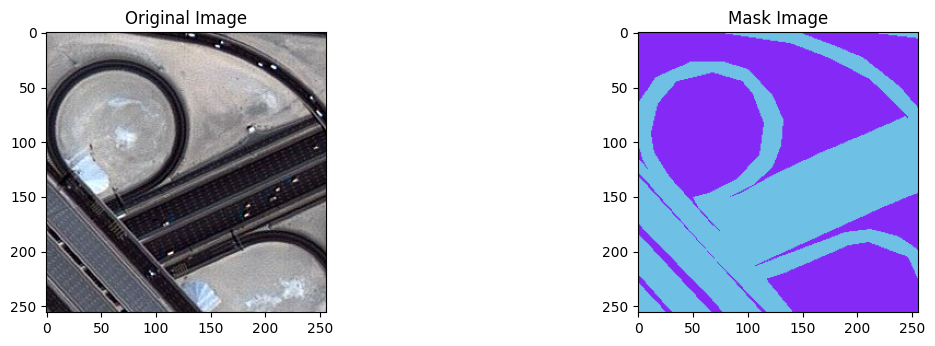

In [52]:
# Run this Cell to get new Image
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title("Original Image")
plt.imshow(image_dataset[random_image_id])
plt.subplot(222)
plt.title("Mask Image")
plt.imshow(mask_dataset[random_image_id])

In [13]:
# Define the class names and hex codes in one place
hex_colors = {
    'building'   : '#3C1098',
    'land'       : '#8429F6',
    'road'       : '#6EC1E4',
    'vegetation' : '#FEDD3A',
    'water'      : '#E2A929',
    'unlabeled'  : '#9B9B9B',
}

# Helper to go from '#RRGGBB' → [R, G, B]
def hex_to_rgb(h):
    h = h.lstrip('#')
    return np.array([int(h[i:i+2], 16) for i in (0, 2, 4)], dtype=np.uint8)

# Build a dict of NumPy arrays
class_colors = {f'class_{name}': hex_to_rgb(code)
                for name, code in hex_colors.items()}

# (Optional) unpack into variables if you really want individual names
class_building, class_land, class_road, class_vegetation, class_water, class_unlabeled = class_colors.values()

# Now you can use:
# class_colors['class_building']  or  class_building
print(class_colors)

{'class_building': array([ 60,  16, 152], dtype=uint8), 'class_land': array([132,  41, 246], dtype=uint8), 'class_road': array([110, 193, 228], dtype=uint8), 'class_vegetation': array([254, 221,  58], dtype=uint8), 'class_water': array([226, 169,  41], dtype=uint8), 'class_unlabeled': array([155, 155, 155], dtype=uint8)}


In [14]:
COLOR2LABEL = {
    idx: rgb
    for idx, rgb in enumerate(class_colors.values())
}
COLOR2LABEL

{0: array([ 60,  16, 152], dtype=uint8),
 1: array([132,  41, 246], dtype=uint8),
 2: array([110, 193, 228], dtype=uint8),
 3: array([254, 221,  58], dtype=uint8),
 4: array([226, 169,  41], dtype=uint8),
 5: array([155, 155, 155], dtype=uint8)}

In [15]:
def rgb_to_label(label_rgb: np.ndarray) -> np.ndarray:
    h, w, _ = label_rgb.shape
    label_map = np.zeros((h, w), dtype=np.uint8)
    for lbl_val, rgb_color in COLOR2LABEL.items():
        mask = np.all(label_rgb == rgb_color, axis=-1)
        label_map[mask] = lbl_val
    return label_map


In [16]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [17]:
len(labels)

945

In [18]:
print(type(labels))

<class 'list'>


In [19]:
labels = np.array(labels)
print(type(labels))

<class 'numpy.ndarray'>


array([[4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)
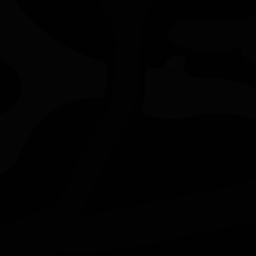

In [20]:
labels[2]

In [21]:
labels.shape

(945, 256, 256)

In [22]:
labels = np.expand_dims(labels, axis=3)
labels.shape

(945, 256, 256, 1)

In [23]:
image_dataset.shape

(945, 256, 256, 3)

In [24]:
mask_dataset.shape

(945, 256, 256, 3)

In [25]:
# labels[2]

In [26]:
# image_dataset[2]

In [27]:
# mask_dataset[2]

In [28]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [29]:
print(f"Total unique labels based on masks: {np.unique(labels)}")

Total unique labels based on masks: [0 1 2 3 4 5]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
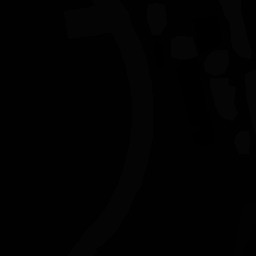

In [30]:
labels[0][:,:,0]

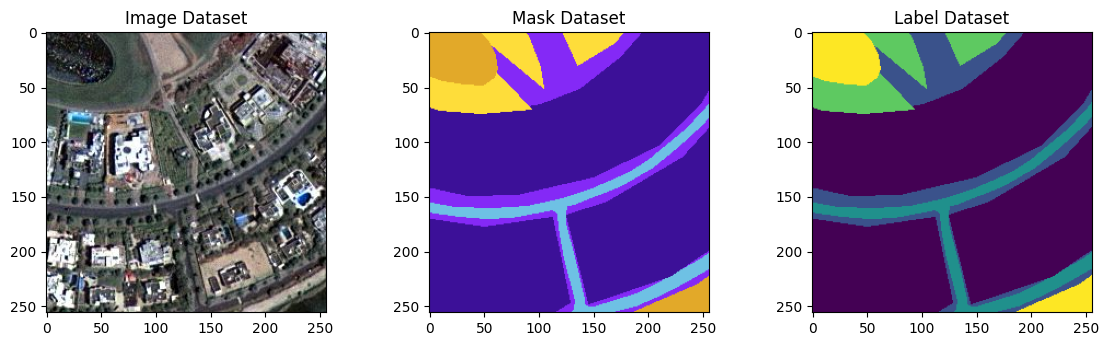

In [31]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Image Dataset")
plt.imshow(image_dataset[random_image_id])
plt.subplot(232)
plt.title("Mask Dataset")
plt.imshow(mask_dataset[random_image_id])
plt.subplot(233)
plt.title("Label Dataset")
plt.imshow(labels[random_image_id][:,:,0])

In [32]:
total_classes = len(np.unique(labels))
print(f"Total {total_classes} classes are available in the label.")

Total 6 classes are available in the label.


In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [35]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [36]:
master_trianing_dataset = image_dataset.copy()

In [37]:
master_trianing_dataset.shape

(945, 256, 256, 3)

#### Spliting Datasets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [41]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [42]:
# Cleaning RAM for Model Training
del (
    # file‑walking & path vars
    # path, subdirs, files, dir_name, images,
    # dataset_root, dataset_folder,
    # patching & cropping temps
    # image_extension, image_type, tile_id, image_id,
    # image, size_x, size_y,
    # image_patches, patched_images,
    # image_1, image_x, image_y,
    # individual_patched_image, individual_patched_mask,
    # raw datasets before split
    image_dataset, mask_dataset,
    # color→label machinery
    hex_colors, class_colors, COLOR2LABEL,
    hex_to_rgb, rgb_to_label,
    # label arrays
    labels, labels_categorical_dataset,
    # master copy
    master_trianing_dataset,
    # misc
    random_image_id
)
import gc; gc.collect()

0

In [66]:
# Saving splited datasets in a file (numpy array comprression) for later use
np.savez_compressed(
    f'{dataset_root}{dataset_folder}/datasets_split.npz',
    X_train=X_train,
    X_test =X_test,
    y_train=y_train,
    y_test =y_test
)

### Load Splited Datasets from File

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
dataset_root = '/content/drive/MyDrive/'
dataset_folder = "Dubai_Arial_Datasets"

In [2]:
import numpy as np

data = np.load(f'{dataset_root}{dataset_folder}/datasets_split.npz')
X_train, X_test, y_train, y_test = (
    data['X_train'], data['X_test'], data['y_train'], data['y_test']
)


In [3]:
X_train.shape

(803, 256, 256, 3)

## Modeling

In [3]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.6 MB/s eta 0:00:00


### Why U-Net Model:

In recent days, so many papers and trained models (e.g. [*geoai-py* by Qiusheng Wu](https://opengeoai.org/examples/water_detection/#train-semantic-segmentation-model) has many deployed models with good accuracy) are available and build U-Net for Sematic Segmentations and it give good results as well for small-medium datasets.
>**Semantic Segmentation** is the task of assigning a class label to every pixel in an image, effectively partitioning the image into semantically meaningful regions (e.g., road, building, vegetation). This differs from object detection (which draws bounding boxes) and instance segmentation (which distinguishes between individual object instances).

> **U‑Net** is designed end‑to‑end for dense, pixel‑wise segmentation, using symmetric encoder–decoder paths with skip connections to recover fine spatial details (Ronneberger et al., 2015)⁽¹⁾. It trains well on limited data—benefiting from heavy augmentation and a compact architecture—making it effective in small‑sample settings (Çiçek et al., 2016)⁽²⁾. U‑Net adapts easily to any number of input channels (e.g., RGB or multispectral) by adjusting its first convolutional layer, and is far lighter and faster than region‑based detectors like Mask R‑CNN when you only need a semantic mask⁽³⁾.



1.   [*U. Ronneberger, P. Fischer, T. Brox. “U‑Net: Convolutional Networks for Biomedical Image Segmentation.” International Conference on Medical Image Computing and Computer-Assisted Intervention (MICCAI), 2015.*](https://arxiv.org/pdf/1505.04597)
2.   [*Ö. Çiçek, A. Abdulkadir, S. S. L. Lowe, F. Jäger, et al. “3D U‑Net: Learning Dense Volumetric Segmentation from Sparse Annotation.” MICCAI, 2016.*](https://www.researchgate.net/publication/304226155_3D_U-Net_Learning_Dense_Volumetric_Segmentation_from_Sparse_Annotation)
3.   [*K. He, G. Gkioxari, P. Dollár, R. Girshick. “Mask R‑CNN.” International Conference on Computer Vision (ICCV), 2017.*](https://ieeexplore.ieee.org/document/8237584)




In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, BatchNormalization, Dropout, Lambda

### Jaccard
**Segmentation** is inherently unbalanced (e.g. small roads vs. large background), so overlap‑based losses ([Dice](https://arxiv.org/html/2312.05391v1), [Jaccard](https://en.wikipedia.org/wiki/Jaccard_index)) and focal weighting help the network learn meaningful masks rather than just background.

In [5]:
from tensorflow.keras import backend as K

In [6]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [7]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [8]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [9]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [10]:
model = get_deep_learning_model()

In [11]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

###

In [12]:
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [13]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [14]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [15]:
total_loss = dice_loss + (1 * focal_loss)

In [16]:
import tensorflow as tf

In [17]:
tf.keras.backend.clear_session()

In [18]:
metrics = ["accuracy", jaccard_coef]

In [19]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 62s 658ms/step - accuracy: 0.4499 - jaccard_coef: 0.2117 - loss: 1.0132 - val_accuracy: 0.6311 - val_jaccard_coef: 0.3506 - val_loss: 0.9926
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.6582 - jaccard_coef: 0.3422 - loss: 0.9871 - val_accuracy: 0.7142 - val_jaccard_coef: 0.4579 - val_loss: 0.9661
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.7058 - jaccard_coef: 0.4589 - loss: 0.9642 - val_accuracy: 0.7005 - val_jaccard_coef: 0.4558 - val_loss: 0.9658
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.7450 - jaccard_coef: 0.4976 - loss: 0.9570 - val_accuracy: 0.6793 - val_jaccard_coef: 0.4257 - val_loss: 0.9691
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.7515 - jaccard_coef: 0.5054 - loss: 0.9519 - val_accuracy: 0.6890 - val_jaccard_coef: 0.4752 - val_loss: 0.9728
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.7629 - jaccard_coef: 0.5365 - loss: 0.9470 - v

In [23]:
history_a = model_history

In [24]:
history_a.history

{'accuracy': [0.5509042143821716,
  0.6651283502578735,
  0.7194222211837769,
  0.7490836381912231,
  0.7584279179573059,
  0.7722799777984619,
  0.786986768245697,
  0.796013355255127,
  0.8049811124801636,
  0.8121751546859741,
  0.8177388310432434,
  0.8215967416763306,
  0.8266634941101074,
  0.8294013142585754,
  0.833855926990509,
  0.8267808556556702,
  0.8406670689582825,
  0.8426173329353333,
  0.8450270891189575,
  0.8491239547729492,
  0.8515702486038208,
  0.852984607219696,
  0.8543708920478821,
  0.8560593128204346,
  0.8588353991508484,
  0.8595907688140869,
  0.8613985180854797,
  0.8613797426223755,
  0.8651777505874634,
  0.8636838793754578,
  0.8666069507598877,
  0.8693985342979431,
  0.8662487864494324,
  0.8660587668418884,
  0.8643970489501953,
  0.8673511743545532,
  0.867831826210022,
  0.8705459833145142,
  0.8723441958427429,
  0.8641406297683716,
  0.8705435991287231,
  0.8722900748252869,
  0.8739224076271057,
  0.8739797472953796,
  0.8753267526626587,
  0

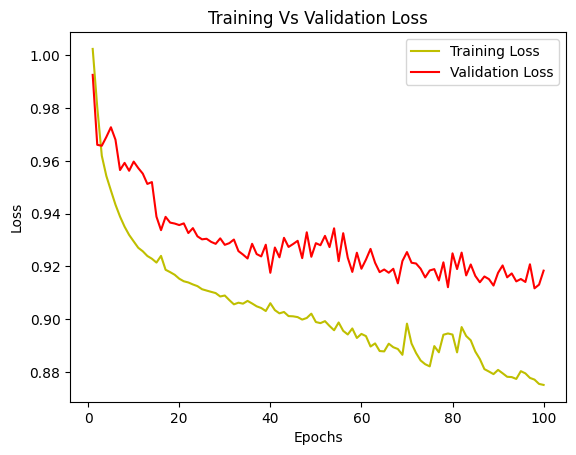

In [29]:
from matplotlib import pyplot as plt

loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

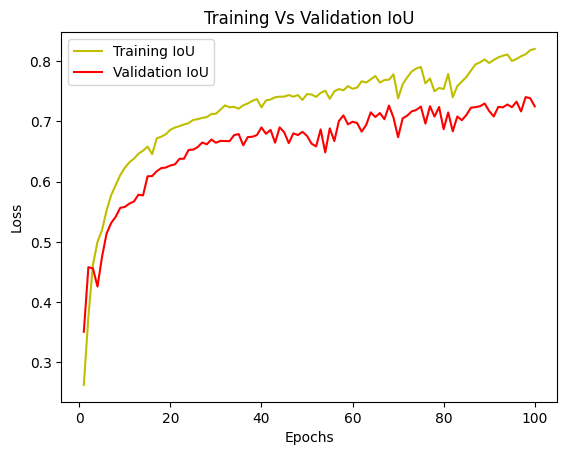

In [30]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [31]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [32]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step


In [33]:
len(y_pred)

142

In [34]:
y_pred

array([[[[4.47098576e-02, 7.24509418e-01, 1.94739535e-01,
          2.53963340e-02, 9.81436018e-03, 8.30484147e-04],
         [3.23270038e-02, 8.21111917e-01, 1.33118913e-01,
          1.08633945e-02, 2.51796446e-03, 6.08064147e-05],
         [4.07903753e-02, 8.38185310e-01, 1.13268703e-01,
          6.62058871e-03, 1.08615751e-03, 4.89560443e-05],
         ...,
         [6.99584186e-02, 6.92996860e-01, 1.51713952e-01,
          8.09044316e-02, 4.37838770e-03, 4.79521550e-05],
         [7.96333477e-02, 6.94113016e-01, 1.48156643e-01,
          7.18294084e-02, 6.18912280e-03, 7.83909854e-05],
         [1.36853009e-01, 5.36714017e-01, 1.88628599e-01,
          1.16742402e-01, 2.00747885e-02, 9.87244886e-04]],

        [[1.92429088e-02, 8.52457583e-01, 1.21396005e-01,
          4.72248485e-03, 2.10192380e-03, 7.90944905e-05],
         [1.67729091e-02, 8.94424021e-01, 8.64161551e-02,
          2.09648418e-03, 2.86026567e-04, 4.52012091e-06],
         [2.64623482e-02, 8.86117697e-01, 8.4540

In [35]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [36]:
len(y_pred_argmax)

142

In [37]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1]],

       [[4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 

In [38]:
y_test_argmax = np.argmax(y_test, axis=3)

In [39]:
y_test_argmax

array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 1, ..., 4, 4, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 

## Model Results

### Comparing prediction results

In [40]:
import random

In [41]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


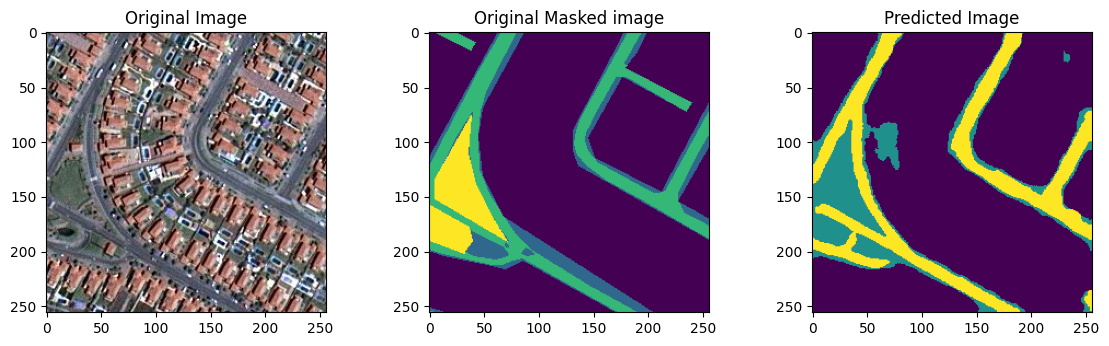

In [42]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [25]:
model.save(f"{dataset_root}{dataset_folder}/satellite_segmentation_full.h5")

In [26]:
import json

with open(f'{dataset_root}{dataset_folder}/history.json', 'w') as f:
    json.dump(model_history.history, f)

In [27]:
import pickle

with open(f'{dataset_root}{dataset_folder}/history.pkl', 'wb') as f:
    pickle.dump(model_history.history, f)

### Visualize Model Architecture with Keras



In [46]:
!apt-get update && apt-get install -y graphviz
!pip install pydot

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,770 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [47]:
from tensorflow.keras.utils import plot_model

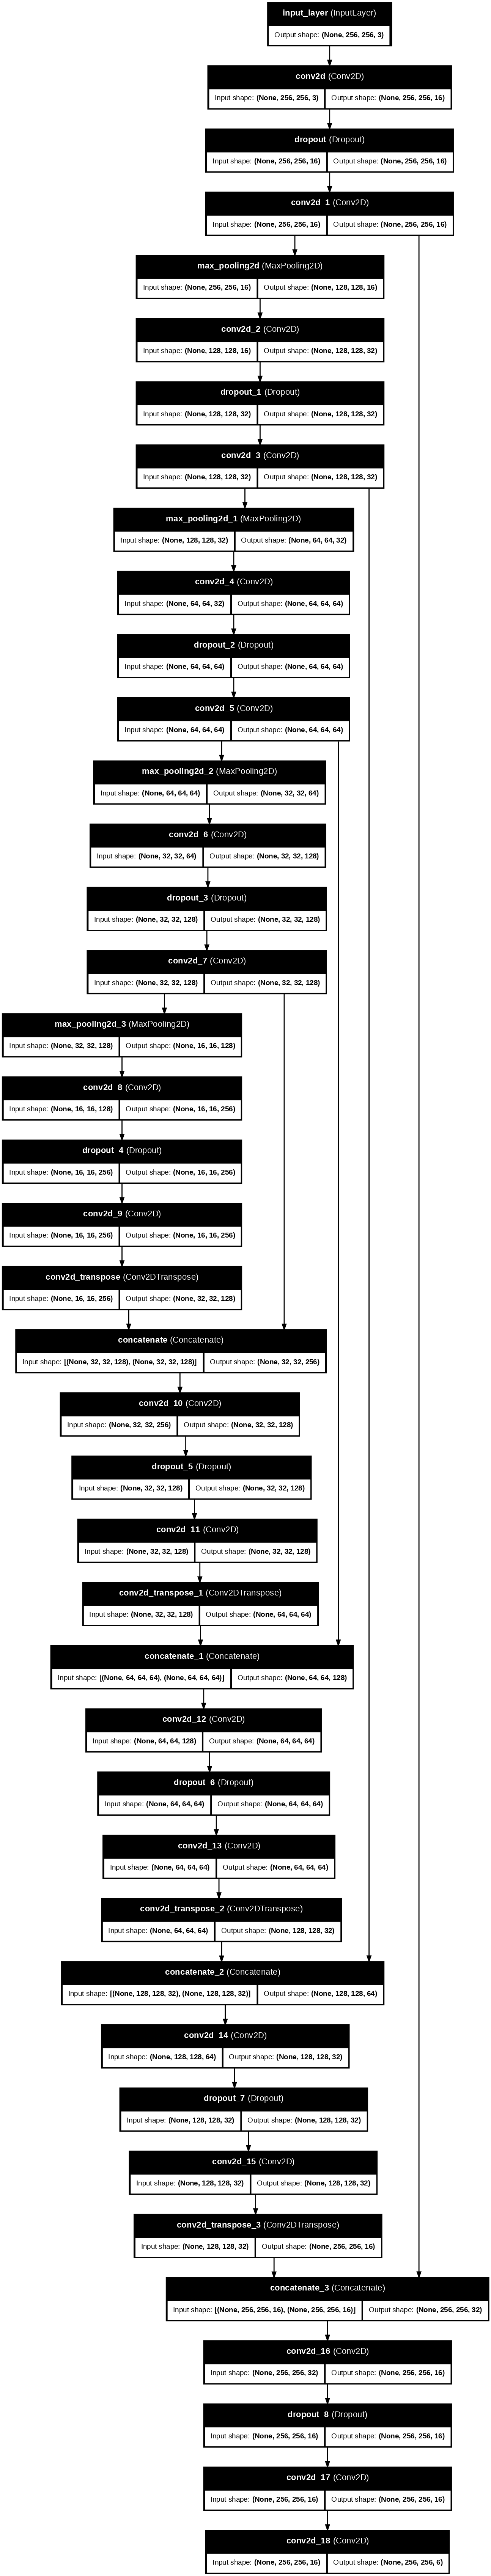

In [49]:
plot_model(
    model,
    to_file=f'{dataset_root}{dataset_folder}/satellite_model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=100
)
# plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)